In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats
from tableone import TableOne
wd = '~/UCD/PEDS/RI Biostatistics Core/Shared/Shared Projects/Laura/BDC/Projects/Kim Driscoll/Bring BG Down/'
import warnings;
warnings.filterwarnings('ignore');

In [2]:
# Enable cell magic for Rpy2 interface
%load_ext rpy2.ipython

# Participant and Data Characteristics

## Table 1: Participant Characteristics at Visit 1

In [3]:
df = pd.read_csv(wd+'Data_Cleaned/bbgd_master.csv')
# Make pretty variables for Table 1
df["Private Insurance"] = ['Yes' if i == 1 else 'No' if i==0 else np.nan for i in df['p_insurance_commercial']]
df["Total Household Income"] = df["par_income"].replace({1:"Under $5K",2:"$5K-$9,999",3:"$10K-$19,999",4:"$20K-29,999", 
                                                   5:"$30K-39,999",6:"$40K-49,999",7:"$50K-59,999",8:"$60K-69,999",
                                                   9:"$70K-79,999",10:"$80K-89,999",11:"$90K-99,999",12:"$100K +"})
df["Parent's Marital Status"] = df["par_marital"].replace({1:"Married to Child's Biologic Father",2:"Married to Child's Stepfather", 
                                                  3:"Separated",4:"Divorced",5:"Widowed",6:"Single",7:"Living with Domestic Partner"})
df["Highest Degree Parent Completed"] = df["par_degree"].replace({1:"No Degree",2:"High School",3:"Associate's",4:"Bachelor's",
                                                                  5:"Master's",6:"Doctoral"})
df["Parent Ethnicity"] = df["par_ethnicity"].replace({1:"Hispanic or Latino",2:"Not Hispanic or Latino"})
df["Parent Race"] = df["par_race"].replace({1:"American Indian or Alaskan Native",2:"Asian",3:"Black or African American",
                                            4:"Native Hawaiian or Pacific Islander",5:"White"})
df["Primary Male Caretaker"] = df["par_race"].replace({1:"Father",2:"Stepfather",3:"Grandfather",4:"Uncle",5:"Mother's boyfriend/partner",6:"Other"})
# Main outcomes
df["Parent Maintain High BG of HFS"] = df["p_maintain_high"]
df["Parent Worry/Helplessness Subscale of HFS"] = df["p_helpless"]
df["Parent Social Consequences Subscale of HFS"] = df["p_social"]
df["Parent GAD-7 Score"] = df["p_gad_total"]
# Make table 1
cols = ["Parent Maintain High BG of HFS","Parent Worry/Helplessness Subscale of HFS",
        "Parent Social Consequences Subscale of HFS","Parent GAD-7 Score",
        "Private Insurance","Total Household Income","Parent's Marital Status",
       "Highest Degree Parent Completed","Parent Race","Parent Ethnicity","Primary Male Caretaker"]

# Print
t1 = TableOne(df.query("studyvisit == 1"),columns=cols,groupby='treatment_group',pval=True,display_all=True,
             normal_test=True,tukey_test=True,dip_test=True)
t1

Grouped by treatment_group                                            
                                                                                                             Missing     Overall           0           1 P-Value
n                                                                                                                             43          22          21        
Parent Maintain High BG of HFS, mean (SD)                                                                          1   6.5 (2.8)   6.0 (3.0)   7.0 (2.6)   0.303
Parent Worry/Helplessness Subscale of HFS, mean (SD)                                                               0  22.2 (6.4)  20.1 (5.9)  24.3 (6.2)   0.027
Parent Social Consequences Subscale of HFS, mean (SD)                                                              1   4.9 (3.2)   4.1 (2.6)   5.7 (3.6)   0.115
Parent GAD-7 Score, mean (SD)                                                                                      0  13.5 (4.9)  12.3 (3.9)  14.7 (5.6)   0.116
Private Insurance, n (%)                              No                                                           0   11 (25.6)    5 (22.7)    6 (28.6)   0.929
                                                      Yes                                                              32 (74.4)   17 (77.3)   15 (71.4)        
Total Household Income, n (%)                         $100K +                                                      2   18 (43.9)    9 (40.9)    9 (47.4)   0.902
                                                      $20K-29,999                                                        3 (7.3)     2 (9.1)     1 (5.3)        
                                                      $30K-39,999                                                        3 (7.3)     2 (9.1)     1 (5.3)        
                                                      $40K-49,999                                                        2 (4.9)     2 (9.1)                    
                                                      $50K-59,999                                                        3 (7.3)     1 (4.5)    2 (10.5)        
                                                      $60K-69,999                                                        2 (4.9)     1 (4.5)     1 (5.3)        
                                                      $70K-79,999                                                        4 (9.8)     2 (9.1)    2 (10.5)        
                                                      $80K-89,999                                                        2 (4.9)     1 (4.5)     1 (5.3)        
                                                      $90K-99,999                                                        3 (7.3)     2 (9.1)     1 (5.3)        
                                                      Under $5K                                                          1 (2.4)                 1 (5.3)        
Parent's Marital Status, n (%)                        Divorced                                                     1    8 (19.0)    3 (14.3)    5 (23.8)   0.201
                                                      Living with Domestic Partner                                       2 (4.8)                 2 (9.5)        
                                                      Married to Child's Biologic Father                               30 (71.4)   16 (76.2)   14 (66.7)        
                                                      Widowed                                                            2 (4.8)     2 (9.5)                    
Highest Degree Parent Completed, n (%)                Associate's                                                  0    6 (14.0)                6 (28.6)   0.090
                                                      Bachelor's                                                       17 (39.5)    9 (40.9)    8 (38.1)        
                                                      Doctoral   

Highest Degree Parent Completed, Total Household Income, and Parent's Marital Status were not significant by Fisher's exact test either (p = 0.063, 0.969, and 0.297 respectively).

## Outcome Plots

Two of the four outcomes were reasonably normally distributed, but 'p_social' and 'p_gad_total' were skewed and unable to be log-transformed due to many 0 values.

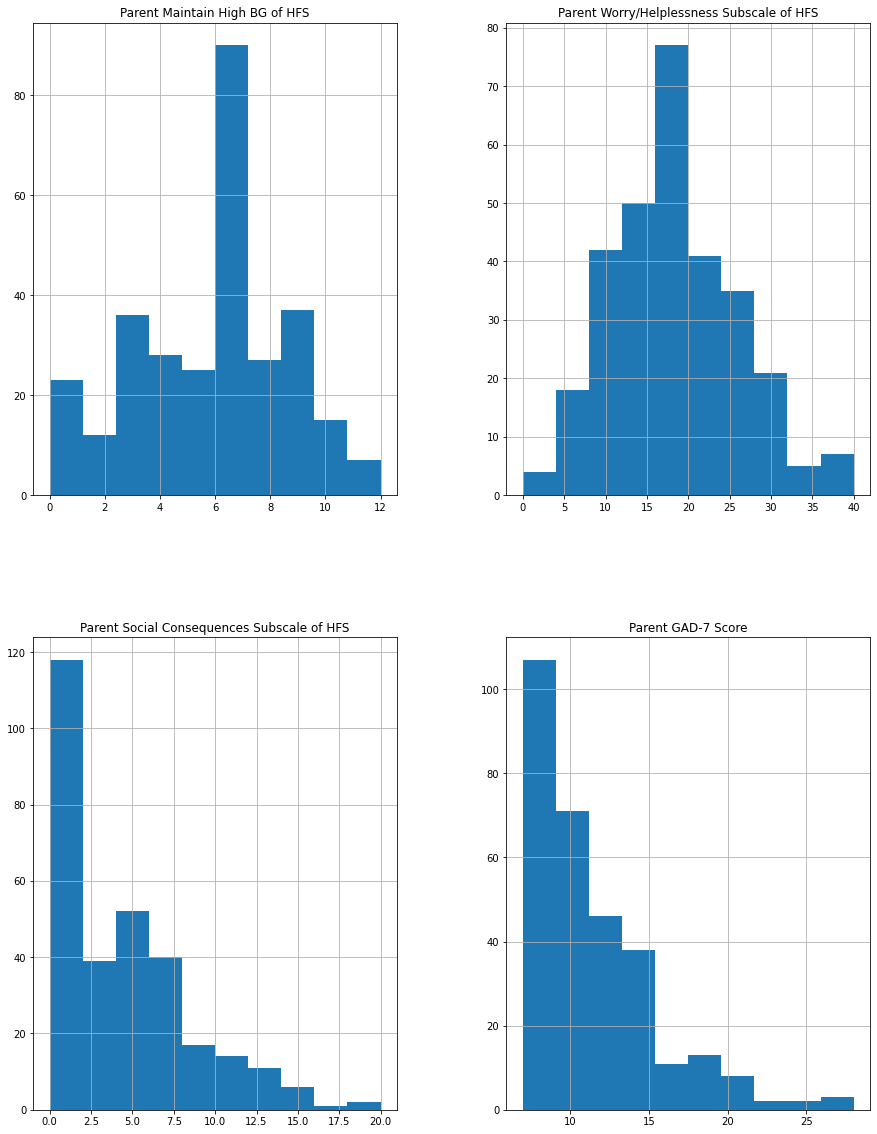

In [4]:
# Define main outcomes for plotting
var_list = ["Parent Maintain High BG of HFS","Parent Worry/Helplessness Subscale of HFS","Parent Social Consequences Subscale of HFS","Parent GAD-7 Score"]
# Plot
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df[var_list].hist(ax = ax);# Semicolon hides the matplotlib descriptions in Jupyter

# Model Results
All four outcomes were evaluated using a linear mixed model with random intercept for participant. Model assumptions were checked visually. Study visit was treated as a categorical variable to help account for non-linear trends and varying time to visits. In the following tables, "C(studyvisit)[T.2]" refers to study visit 2, "C(studyvisit)[T.3]" to visit 3, etc.

Income was split into three groups: Under \\$5K-\\$29,999 (reference group); \\$30K-\\$69,999 ("C(par_income)[T.Interval(4, 8, closed='right')]"); and \\$70K-\\$100K+ ("C(par_income)[T.Interval(8, 12, closed='right')]").

In [5]:
# Import age information
v1_dates = pd.read_csv(wd+'Data_Cleaned/v1_dates.csv',usecols=['ID','T1','T1D_Onset'])
v1_dates.rename(columns={'ID':'participant_id','T1':'t1_date','T1D_Onset':'t1d_onset'},inplace=True)
# Merge, convert to date
df = df.merge(v1_dates,how='left',on='participant_id')
df['t1_date']=pd.to_datetime(df['t1_date'], errors='coerce', format='%m/%d/%y')
df['t1d_onset']=pd.to_datetime(df['t1d_onset'], errors='coerce', format='%m/%d/%y')
# Calculate age at T1
df['c_dob']= pd.to_datetime(df['c_dob'], errors='coerce', format='%m/%d/%y')
df['age']=df['t1_date']-df['c_dob']
df['age']=[float(t.days)/365.25 for t in df['age']]
# Calculate T1D duration at T1
df['t1d_duration']=df['t1_date']-df['t1d_onset']
df['t1d_duration']=[float(t.days)/365.25 for t in df['t1d_duration']]
# Cut income into three levels, fill down 
df['par_income'] = df.groupby('participant_id')['par_income'].ffill()
df['par_income'] = pd.cut(df['par_income'],[0,4,8,12])
df.to_csv(wd+'Data_Cleaned/cleaned_df.csv')

In [6]:
# Residual plotting function
def plot_resid(model):
    fig, ax = plt.subplots(1,2,figsize = (15,10))
    res = model.resid
    kde = sns.kdeplot(mdf.resid, fill = True,ax=ax[0])
    kde.set_title("KDE Plot of Model Residuals")
    kde.set_xlabel("Residuals")
    qq = sm.qqplot(res,line='s',ax=ax[1])

## Raw Scores

### Parent Maintain High BG of HFS

#### Adjusted for Age

In [7]:
# Fit a random intercept for each participant
ri_mod = smf.mixedlm("p_maintain_high ~ C(studyvisit)*C(treatment_group)+par_income+age", 
                     df, groups=df["participant_id"],missing = "drop")
mdf = ri_mod.fit()
results_summary = mdf.summary()
results_summary.tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,3.082,1.726,1.785,0.074,-0.302,6.465
C(studyvisit)[T.2],0.343,0.527,0.650,0.515,-0.690,1.375
C(studyvisit)[T.3],1.403,0.527,2.663,0.008,0.370,2.436
C(studyvisit)[T.4],-0.417,0.501,-0.834,0.404,-1.399,0.564
C(studyvisit)[T.5],-0.341,0.548,-0.622,0.534,-1.415,0.734
C(studyvisit)[T.6],-0.518,0.508,-1.021,0.307,-1.514,0.477
C(studyvisit)[T.7],-0.699,0.508,-1.377,0.169,-1.694,0.296
C(studyvisit)[T.8],-0.523,0.501,-1.045,0.296,-1.505,0.458
C(treatment_group)[T.1],0.794,0.822,0.967,0.334,-0.816,2.405
"par_income[T.Interval(4, 8, closed='right')]",0.288,1.284,0.225,0.822,-2.229,2.806


#### Adjusted for T1D Duration

In [8]:
# Fit a random intercept for each participant
ri_mod = smf.mixedlm("p_maintain_high ~ C(studyvisit)*C(treatment_group)+par_income+t1d_duration", 
                     df, groups=df["participant_id"],missing = "drop")
mdf = ri_mod.fit()
results_summary = mdf.summary()
results_summary.tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,3.669,1.584,2.316,0.021,0.564,6.774
C(studyvisit)[T.2],0.167,0.514,0.324,0.746,-0.842,1.175
C(studyvisit)[T.3],1.283,0.507,2.533,0.011,0.290,2.276
C(studyvisit)[T.4],-0.461,0.499,-0.925,0.355,-1.439,0.516
C(studyvisit)[T.5],-0.426,0.506,-0.841,0.400,-1.418,0.566
C(studyvisit)[T.6],-0.556,0.506,-1.099,0.272,-1.548,0.436
C(studyvisit)[T.7],-0.672,0.506,-1.329,0.184,-1.664,0.319
C(studyvisit)[T.8],-0.555,0.498,-1.113,0.266,-1.532,0.422
C(treatment_group)[T.1],0.944,0.830,1.137,0.255,-0.683,2.570
"par_income[T.Interval(4, 8, closed='right')]",0.751,1.382,0.543,0.587,-1.958,3.460


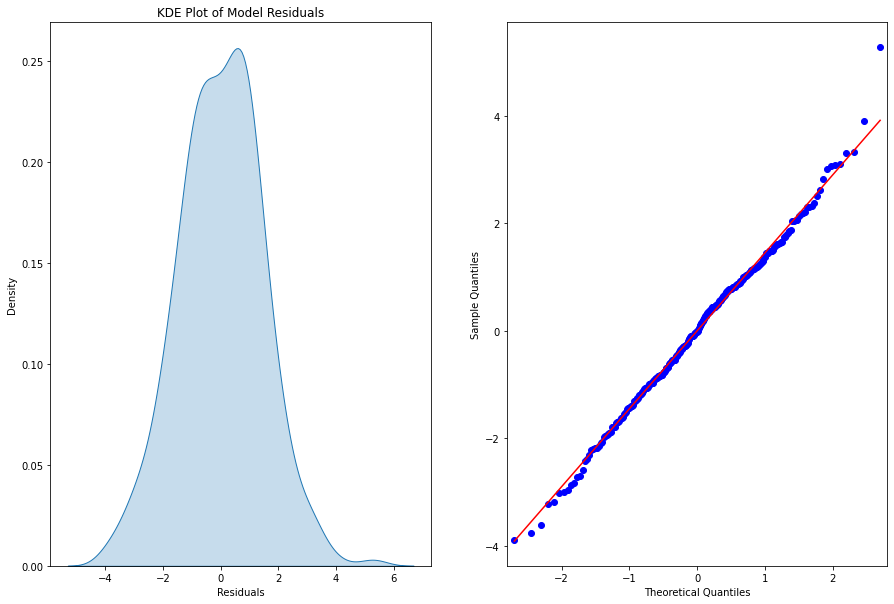

In [9]:
plot_resid(mdf)

### Parent Worry/Helplessness Subscale of HFS

#### Adjusted for Age

In [10]:
# Fit a random intercept for each participant
ri_mod = smf.mixedlm("p_helpless ~ C(studyvisit)*C(treatment_group)+par_income+age", 
                     df, groups=df["participant_id"],missing = "drop")
mdf = ri_mod.fit()
results_summary = mdf.summary()
results_summary.tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,18.077,5.024,3.598,0.000,8.230,27.925
C(studyvisit)[T.2],-1.179,1.313,-0.898,0.369,-3.752,1.394
C(studyvisit)[T.3],-6.718,1.314,-5.114,0.000,-9.292,-4.143
C(studyvisit)[T.4],-3.196,1.248,-2.562,0.010,-5.641,-0.751
C(studyvisit)[T.5],-1.752,1.367,-1.282,0.200,-4.432,0.927
C(studyvisit)[T.6],-3.888,1.266,-3.071,0.002,-6.369,-1.407
C(studyvisit)[T.7],-2.764,1.265,-2.184,0.029,-5.244,-0.284
C(studyvisit)[T.8],-1.038,1.248,-0.832,0.405,-3.484,1.408
C(treatment_group)[T.1],3.479,2.283,1.524,0.128,-0.995,7.954
"par_income[T.Interval(4, 8, closed='right')]",2.787,3.736,0.746,0.456,-4.536,10.109


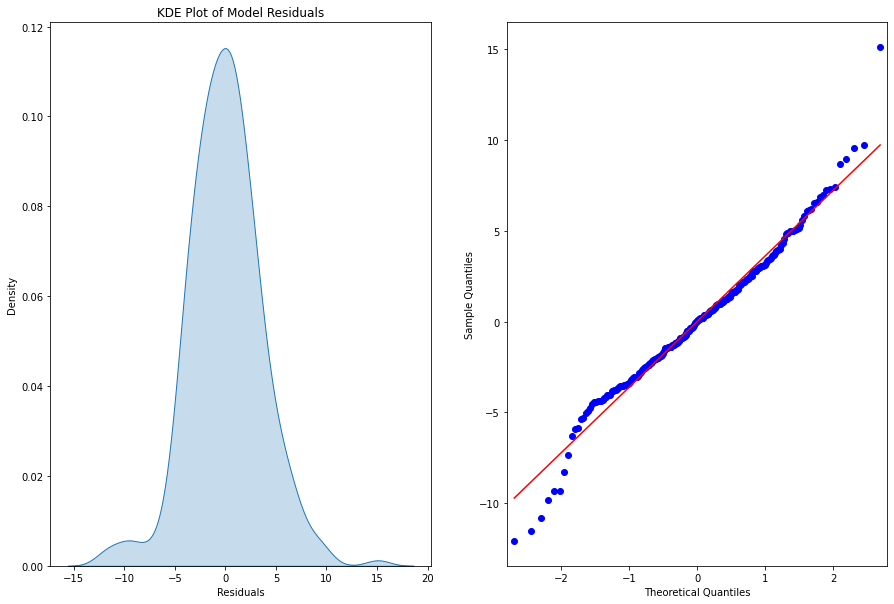

In [11]:
plot_resid(mdf)

#### Adjusted for T1D Duration

In [12]:
# Fit a random intercept for each participant
ri_mod = smf.mixedlm("p_helpless ~ C(studyvisit)*C(treatment_group)+par_income+t1d_duration", 
                     df, groups=df["participant_id"],missing = "drop")
mdf = ri_mod.fit()
results_summary = mdf.summary()
results_summary.tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,15.417,4.559,3.382,0.001,6.482,24.352
C(studyvisit)[T.2],-1.346,1.283,-1.049,0.294,-3.861,1.168
C(studyvisit)[T.3],-6.878,1.263,-5.444,0.000,-9.355,-4.402
C(studyvisit)[T.4],-3.234,1.244,-2.600,0.009,-5.672,-0.796
C(studyvisit)[T.5],-2.287,1.263,-1.811,0.070,-4.762,0.188
C(studyvisit)[T.6],-3.927,1.262,-3.112,0.002,-6.401,-1.453
C(studyvisit)[T.7],-2.751,1.262,-2.180,0.029,-5.223,-0.278
C(studyvisit)[T.8],-1.099,1.243,-0.884,0.377,-3.536,1.337
C(treatment_group)[T.1],3.296,2.287,1.441,0.150,-1.187,7.780
"par_income[T.Interval(4, 8, closed='right')]",3.488,3.989,0.874,0.382,-4.331,11.306


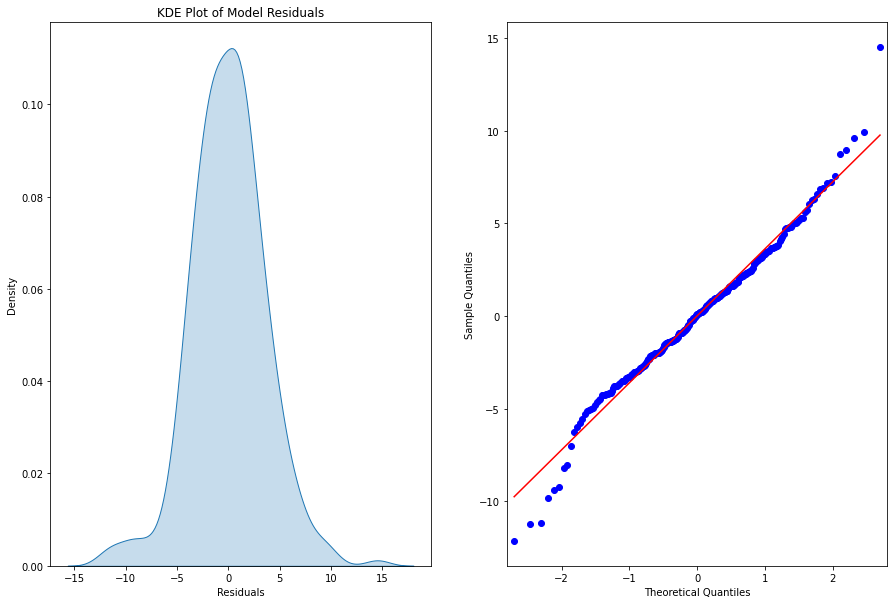

In [13]:
plot_resid(mdf)

### Parent Social Consequences Subscale of HFS

#### Adjusted for Age

In [14]:
# Fit a random intercept for each participant
ri_mod = smf.mixedlm("p_social ~ C(studyvisit)*C(treatment_group)+par_income+age", 
                     df, groups=df["participant_id"],missing = "drop")
mdf = ri_mod.fit()
results_summary = mdf.summary()
results_summary.tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,5.193,2.960,1.754,0.079,-0.608,10.995
C(studyvisit)[T.2],-0.744,0.645,-1.154,0.249,-2.009,0.520
C(studyvisit)[T.3],3.950,0.646,6.118,0.000,2.685,5.216
C(studyvisit)[T.4],-1.497,0.613,-2.440,0.015,-2.699,-0.294
C(studyvisit)[T.5],-1.093,0.672,-1.627,0.104,-2.409,0.224
C(studyvisit)[T.6],-1.189,0.622,-1.910,0.056,-2.409,0.031
C(studyvisit)[T.7],-0.801,0.622,-1.287,0.198,-2.020,0.418
C(studyvisit)[T.8],-0.919,0.614,-1.498,0.134,-2.122,0.284
C(treatment_group)[T.1],1.823,1.298,1.404,0.160,-0.721,4.367
"par_income[T.Interval(4, 8, closed='right')]",2.043,2.198,0.929,0.353,-2.265,6.351


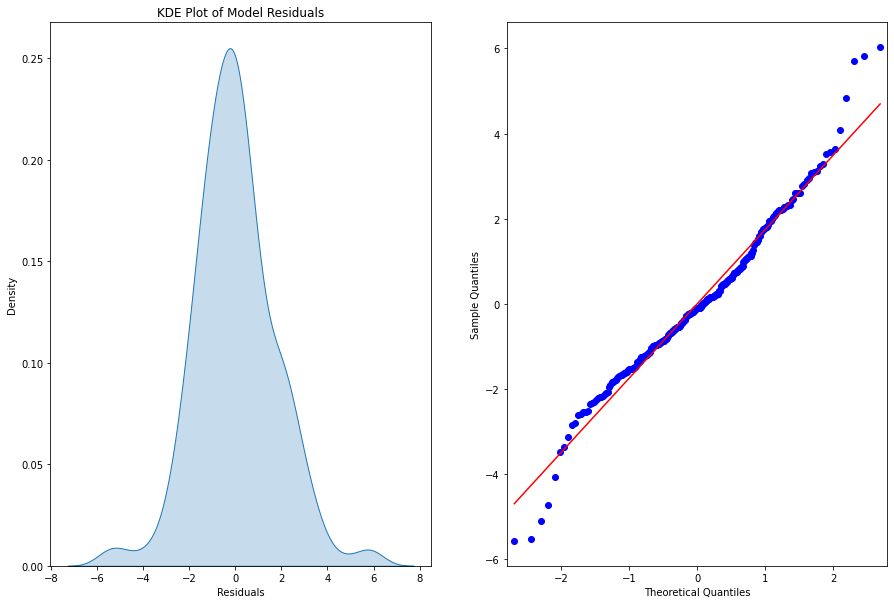

In [15]:
plot_resid(mdf)

#### Adjusted for T1D Duration

In [16]:
# Fit a random intercept for each participant
ri_mod = smf.mixedlm("p_social ~ C(studyvisit)*C(treatment_group)+par_income+t1d_duration", 
                     df, groups=df["participant_id"],missing = "drop")
mdf = ri_mod.fit()
results_summary = mdf.summary()
results_summary.tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,2.464,2.682,0.919,0.358,-2.792,7.721
C(studyvisit)[T.2],-0.754,0.650,-1.159,0.246,-2.028,0.521
C(studyvisit)[T.3],3.523,0.640,5.501,0.000,2.268,4.778
C(studyvisit)[T.4],-1.502,0.630,-2.382,0.017,-2.738,-0.266
C(studyvisit)[T.5],-1.181,0.640,-1.845,0.065,-2.435,0.074
C(studyvisit)[T.6],-1.195,0.640,-1.869,0.062,-2.449,0.058
C(studyvisit)[T.7],-0.806,0.639,-1.261,0.207,-2.059,0.447
C(studyvisit)[T.8],-0.948,0.630,-1.504,0.133,-2.183,0.287
C(treatment_group)[T.1],1.548,1.306,1.185,0.236,-1.012,4.107
"par_income[T.Interval(4, 8, closed='right')]",2.353,2.351,1.001,0.317,-2.254,6.960


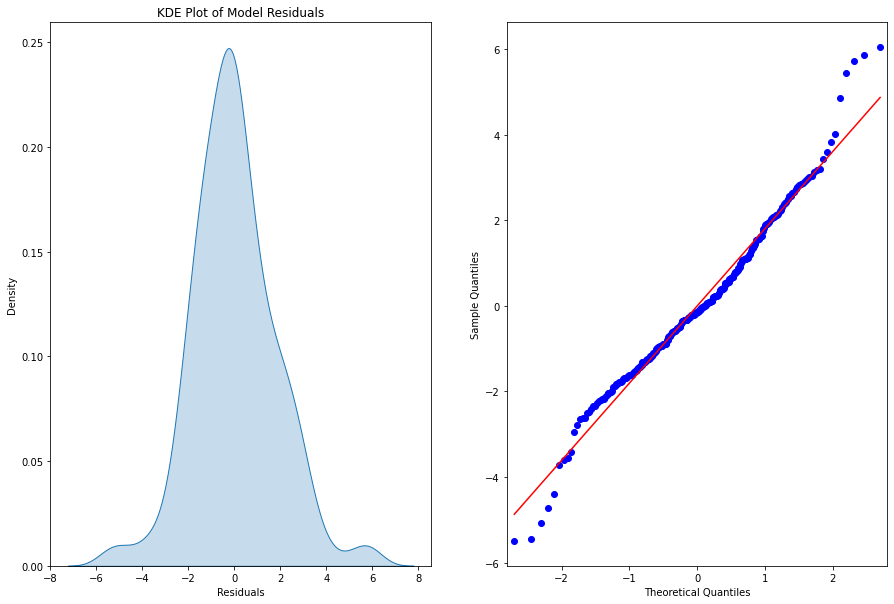

In [17]:
plot_resid(mdf)

### Parent GAD-7 Score

#### Adjusted for Age

In [18]:
# Fit a random intercept for each participant
ri_mod = smf.mixedlm("p_gad_total ~ C(studyvisit)*C(treatment_group)+par_income+age", 
                     df, groups=df["participant_id"],missing = "drop")
mdf = ri_mod.fit()
results_summary = mdf.summary()
results_summary.tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,8.575,2.534,3.384,0.001,3.608,13.541
C(studyvisit)[T.2],-0.190,0.914,-0.208,0.835,-1.981,1.602
C(studyvisit)[T.3],-0.892,0.914,-0.975,0.329,-2.684,0.900
C(studyvisit)[T.4],-1.062,0.868,-1.223,0.221,-2.764,0.640
C(studyvisit)[T.5],0.671,0.951,0.706,0.480,-1.193,2.536
C(studyvisit)[T.6],-0.683,0.881,-0.775,0.438,-2.410,1.044
C(studyvisit)[T.7],-0.488,0.881,-0.554,0.579,-2.216,1.239
C(studyvisit)[T.8],-0.275,0.869,-0.317,0.752,-1.977,1.427
C(treatment_group)[T.1],2.784,1.265,2.201,0.028,0.305,5.264
"par_income[T.Interval(4, 8, closed='right')]",3.879,1.886,2.057,0.040,0.183,7.574


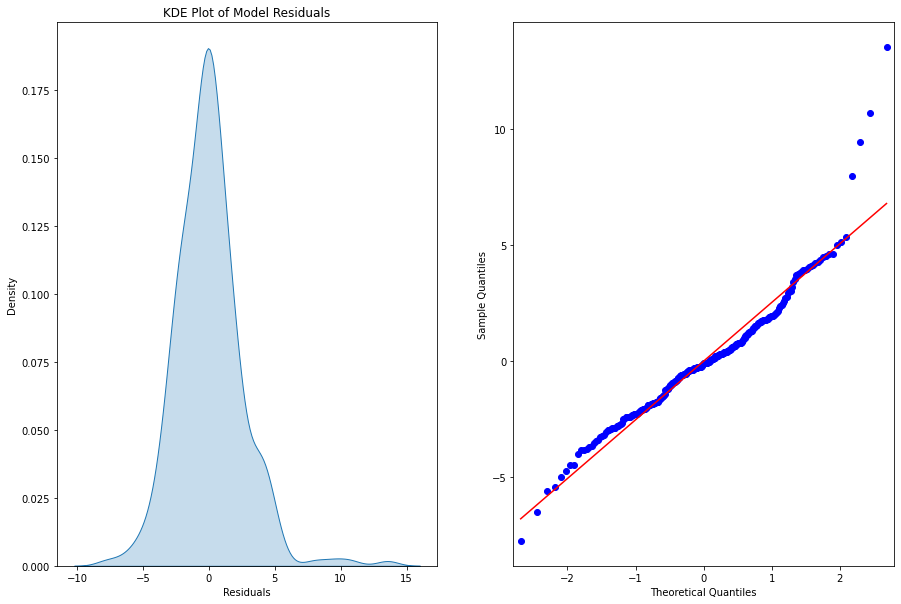

In [19]:
plot_resid(mdf)

#### Adjusted for T1D Duration

In [20]:
# Fit a random intercept for each participant
ri_mod = smf.mixedlm("p_gad_total ~ C(studyvisit)*C(treatment_group)+par_income+t1d_duration", 
                     df, groups=df["participant_id"],missing = "drop")
mdf = ri_mod.fit()
results_summary = mdf.summary()
results_summary.tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,10.876,2.231,4.875,0.000,6.504,15.249
C(studyvisit)[T.2],-0.550,0.890,-0.618,0.537,-2.293,1.194
C(studyvisit)[T.3],-1.071,0.876,-1.223,0.221,-2.787,0.646
C(studyvisit)[T.4],-1.158,0.862,-1.344,0.179,-2.848,0.531
C(studyvisit)[T.5],0.359,0.875,0.411,0.681,-1.356,2.074
C(studyvisit)[T.6],-0.759,0.875,-0.867,0.386,-2.473,0.956
C(studyvisit)[T.7],-0.462,0.875,-0.528,0.597,-2.176,1.252
C(studyvisit)[T.8],-0.360,0.862,-0.417,0.676,-2.048,1.329
C(treatment_group)[T.1],2.954,1.241,2.380,0.017,0.521,5.386
"par_income[T.Interval(4, 8, closed='right')]",3.167,1.934,1.638,0.102,-0.623,6.958


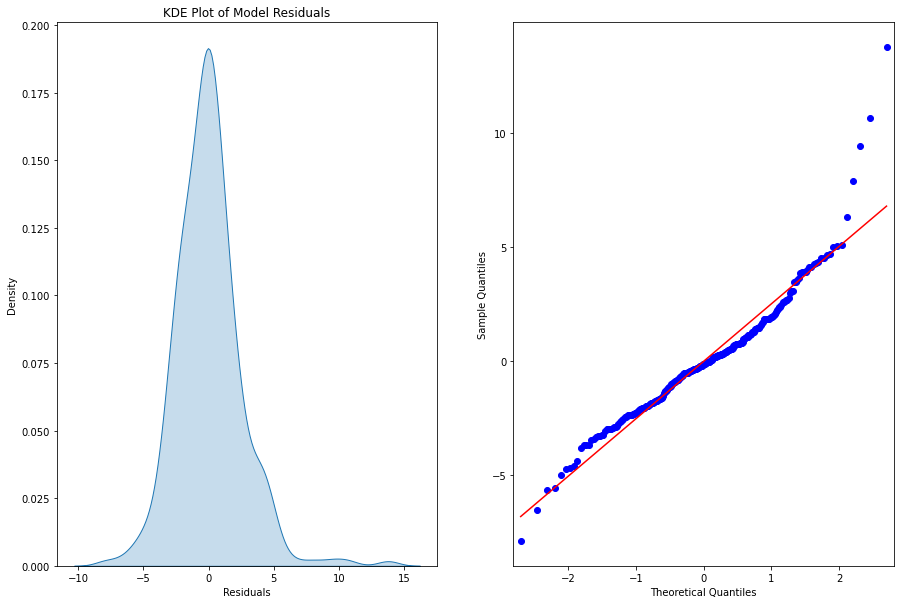

In [21]:
plot_resid(mdf)

## Elevated Scores vs. Not Elevated

All four outcomes were evaluated using a logistic mixed model with random intercept for participant. Coefficient estimates are reported on the log scale.

In [22]:
# Make cutoffs:
# GAD-7 >=10 considered elevated
# Maintain High BG >=7 considered elevated
# Helplessness >=24 considered elevated
# Social Consequences >=9 considered elevated
df['p_elevated_maintain']=[float(1) if m >= 7 else float(0) if m < 7 else np.nan for m in df['p_maintain_high']]
df['p_elevated_helpless']=[float(1) if m >= 24 else float(0) if m < 24 else np.nan for m in df['p_helpless']]
df['p_elevated_social']=[float(1) if m >= 9 else float(0) if m < 9 else np.nan for m in df['p_social']]
df['p_elevated_gad']=[float(1) if m >= 10 else float(0) if m < 10 else np.nan for m in df['p_gad_total']]
# Make simplified DF for R
log_df = df[['participant_id','studyvisit','treatment_group','par_income','age','t1d_duration',
             'p_elevated_maintain','p_elevated_helpless','p_elevated_social','p_elevated_gad']].copy().dropna()
log_df['par_income'] = log_df['par_income'].astype('str')

### Parent Maintain High BG of HFS

#### Adjusted for Age

In [23]:
%%R -i log_df
suppressMessages(library(lme4))
suppressMessages(library(lmerTest))
mod <- glmer(p_elevated_maintain ~ factor(studyvisit)*factor(treatment_group)+factor(par_income)+age+(1|participant_id),data = log_df,family = binomial(link = "logit"))
print(summary(mod)$coefficients[,c(1,4)])

                                               Estimate   Pr(>|z|)
(Intercept)                                  -2.1406858 0.31907899
factor(studyvisit)2                           0.0351626 0.96922677
factor(studyvisit)3                           2.3810699 0.02405139
factor(studyvisit)4                          -0.8382531 0.35152108
factor(studyvisit)5                          -0.5542081 0.56646919
factor(studyvisit)6                          -0.6281879 0.47565452
factor(studyvisit)7                          -1.3689770 0.14087374
factor(studyvisit)8                          -2.2133075 0.02617832
factor(treatment_group)1                     -0.3103162 0.78187485
factor(par_income)(4, 8]                     -0.8756958 0.58259280
factor(par_income)(8, 12]                     1.2577838 0.37592741
age                                           0.1262780 0.30075825
factor(studyvisit)2:factor(treatment_group)1 -2.0680034 0.12254233
factor(studyvisit)3:factor(treatment_group)1 -1.1283462 0.4229

#### Adjusted for T1D Duration

In [24]:
%%R -i log_df
suppressMessages(library(lme4))
suppressMessages(library(lmerTest))
mod <- glmer(p_elevated_maintain ~ factor(studyvisit)*factor(treatment_group)+factor(par_income)+t1d_duration+(1|participant_id),data = log_df,family = binomial(link = "logit"))
print(summary(mod)$coefficients[,c(1,4)])

                                                Estimate   Pr(>|z|)
(Intercept)                                  -1.97351322 0.28803848
factor(studyvisit)2                           0.05159288 0.95472783
factor(studyvisit)3                           2.34399834 0.02478046
factor(studyvisit)4                          -0.83769332 0.35255399
factor(studyvisit)5                          -0.52631016 0.58590405
factor(studyvisit)6                          -0.61631610 0.48473765
factor(studyvisit)7                          -1.35508564 0.14388035
factor(studyvisit)8                          -2.19639430 0.02764862
factor(treatment_group)1                     -0.23392475 0.83169735
factor(par_income)(4, 8]                     -0.30448888 0.85162820
factor(par_income)(8, 12]                     1.69185056 0.24444652
t1d_duration                                  0.14414048 0.21513257
factor(studyvisit)2:factor(treatment_group)1 -2.02337187 0.12972825
factor(studyvisit)3:factor(treatment_group)1 -1.

### Parent Worry/Helplessness Subscale of HFS

#### Adjusted for Age

In [25]:
%%R -i log_df
suppressMessages(library(lme4))
suppressMessages(library(lmerTest))
mod <- glmer(p_elevated_helpless ~ factor(studyvisit)*factor(treatment_group)+factor(par_income)+age+(1|participant_id),data = log_df,family = binomial(link = "logit"))
print(summary(mod)$coefficients[,c(1,4)])

                                                 Estimate   Pr(>|z|)
(Intercept)                                  -4.354672618 0.19747060
factor(studyvisit)2                           1.265994908 0.29156203
factor(studyvisit)3                          -3.430425893 0.03313739
factor(studyvisit)4                          -1.263320733 0.32755067
factor(studyvisit)5                           0.006608136 0.99597069
factor(studyvisit)6                          -0.595844492 0.63599336
factor(studyvisit)7                          -0.355464174 0.77304638
factor(studyvisit)8                           0.227307702 0.84479185
factor(treatment_group)1                      3.309591070 0.04095805
factor(par_income)(4, 8]                      1.794736705 0.46674230
factor(par_income)(8, 12]                     1.852554685 0.40433967
age                                          -0.041226903 0.81504146
factor(studyvisit)2:factor(treatment_group)1 -2.421744540 0.13156161
factor(studyvisit)3:factor(treatme

#### Adjusted for T1D Duration

In [26]:
%%R -i log_df
suppressMessages(library(lme4))
suppressMessages(library(lmerTest))
mod <- glmer(p_elevated_helpless ~ factor(studyvisit)*factor(treatment_group)+factor(par_income)+t1d_duration+(1|participant_id),data = log_df,family = binomial(link = "logit"))
print(summary(mod)$coefficients[,c(1,4)])

                                                Estimate   Pr(>|z|)
(Intercept)                                  -6.57952979 0.04153136
factor(studyvisit)2                           1.13296214 0.34218907
factor(studyvisit)3                          -3.72680653 0.02260073
factor(studyvisit)4                          -1.54200274 0.23746016
factor(studyvisit)5                          -0.20299977 0.87667988
factor(studyvisit)6                          -0.86386020 0.49592793
factor(studyvisit)7                          -0.54781674 0.65479868
factor(studyvisit)8                           0.03146204 0.97831051
factor(treatment_group)1                      3.13250414 0.05508536
factor(par_income)(4, 8]                      2.55420236 0.34471431
factor(par_income)(8, 12]                     2.39136496 0.31739699
t1d_duration                                  0.18979891 0.30096250
factor(studyvisit)2:factor(treatment_group)1 -2.37238994 0.14157346
factor(studyvisit)3:factor(treatment_group)1 -1.

### Parent Social Consequences Subscale of HFS

#### Adjusted for Age

In [27]:
%%R -i log_df
suppressMessages(library(lme4))
suppressMessages(library(lmerTest))
mod <- glmer(p_elevated_social ~ factor(studyvisit)*factor(treatment_group)+factor(par_income)+age+(1|participant_id),data = log_df,family = binomial(link = "logit"))
print(summary(mod)$coefficients[,c(1,4)])

                                                Estimate    Pr(>|z|)
(Intercept)                                   -4.9624551 0.251331642
factor(studyvisit)2                            0.8884280 0.803394906
factor(studyvisit)3                            7.8696466 0.009716047
factor(studyvisit)4                           -0.3845831 0.896191326
factor(studyvisit)5                            0.5858532 0.865197125
factor(studyvisit)6                          -14.6650311 0.968715104
factor(studyvisit)7                            0.3819080 0.908905662
factor(studyvisit)8                            2.4507189 0.347189985
factor(treatment_group)1                       5.0901791 0.082065783
factor(par_income)(4, 8]                       2.4646172 0.415462704
factor(par_income)(8, 12]                      0.2200248 0.937493729
age                                           -0.2734210 0.174821145
factor(studyvisit)2:factor(treatment_group)1  -2.0587172 0.589317701
factor(studyvisit)3:factor(treatme

#### Adjusted for T1D Duration

In [28]:
%%R -i log_df
suppressMessages(library(lme4))
suppressMessages(library(lmerTest))
mod <- glmer(p_elevated_social ~ factor(studyvisit)*factor(treatment_group)+factor(par_income)+t1d_duration+(1|participant_id),data = log_df,family = binomial(link = "logit"))
print(summary(mod)$coefficients[,c(1,4)])

                                                Estimate    Pr(>|z|)
(Intercept)                                   -6.7490958 0.104892504
factor(studyvisit)2                            0.6533867 0.843947694
factor(studyvisit)3                            7.9172714 0.007293589
factor(studyvisit)4                           -0.4195947 0.878215981
factor(studyvisit)5                            0.4209313 0.895595123
factor(studyvisit)6                          -15.9903937 0.976693953
factor(studyvisit)7                            0.4483322 0.883833735
factor(studyvisit)8                            2.3007491 0.350039069
factor(treatment_group)1                       4.5513511 0.100561549
factor(par_income)(4, 8]                       1.8721815 0.555903862
factor(par_income)(8, 12]                     -0.3736289 0.897810810
t1d_duration                                  -0.1475135 0.478675715
factor(studyvisit)2:factor(treatment_group)1  -1.7591658 0.623748313
factor(studyvisit)3:factor(treatme

### Parent GAD-7 Score

#### Adjusted for Age

In [29]:
%%R -i log_df
suppressMessages(library(lme4))
suppressMessages(library(lmerTest))
mod <- glmer(p_elevated_gad ~ factor(studyvisit)*factor(treatment_group)+factor(par_income)+age+(1|participant_id),data = log_df,family = binomial(link = "logit"))
print(summary(mod)$coefficients[,c(1,4)])

                                                Estimate   Pr(>|z|)
(Intercept)                                  -0.42980278 0.79940732
factor(studyvisit)2                           1.07166001 0.24432106
factor(studyvisit)3                          -0.15202846 0.86264243
factor(studyvisit)4                           1.13593940 0.21048261
factor(studyvisit)5                          -0.87805051 0.33155129
factor(studyvisit)6                           0.87872370 0.33203616
factor(studyvisit)7                           0.14121511 0.86931780
factor(studyvisit)8                          -0.87550480 0.29132263
factor(treatment_group)1                      0.85252121 0.41999832
factor(par_income)(4, 8]                      3.02512891 0.01629714
factor(par_income)(8, 12]                     1.99908921 0.06691748
age                                          -0.03945028 0.67717328
factor(studyvisit)2:factor(treatment_group)1 -0.59650425 0.67917421
factor(studyvisit)3:factor(treatment_group)1 -0.

#### Adjusted for T1D Duration

In [30]:
%%R -i log_df
suppressMessages(library(lme4))
suppressMessages(library(lmerTest))
mod <- glmer(p_elevated_gad ~ factor(studyvisit)*factor(treatment_group)+factor(par_income)+t1d_duration+(1|participant_id),data = log_df,family = binomial(link = "logit"))
print(summary(mod)$coefficients[,c(1,4)])

                                                Estimate   Pr(>|z|)
(Intercept)                                   0.04693409 0.97476736
factor(studyvisit)2                           1.06826551 0.24525779
factor(studyvisit)3                          -0.17031213 0.84623467
factor(studyvisit)4                           1.12608639 0.21355274
factor(studyvisit)5                          -0.87965542 0.32889113
factor(studyvisit)6                           0.87454413 0.33364954
factor(studyvisit)7                           0.14605718 0.86437038
factor(studyvisit)8                          -0.88062055 0.28751508
factor(treatment_group)1                      0.84671550 0.41867519
factor(par_income)(4, 8]                      2.62094277 0.04369895
factor(par_income)(8, 12]                     1.70110853 0.12734532
t1d_duration                                 -0.10021668 0.29329656
factor(studyvisit)2:factor(treatment_group)1 -0.63096066 0.66191408
factor(studyvisit)3:factor(treatment_group)1 -0.